In [1]:
#Power System Lstm keras

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time
import csv
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
%matplotlib inline
np.random.seed(1234)

In [27]:
def data_power_consumption(path_to_dataset,
                           sequence_length=50,
                           ratio=1.0):

    max_values = ratio * 2049280

    with open(path_to_dataset) as f:
        data = csv.reader(f, delimiter=";")
        power = []
        nb_of_values = 0
        for line in data:
            try:
                power.append(float(line[2]))
                nb_of_values += 1
            except ValueError:
                pass
            # 2049280.0 is the total number of valid values, i.e. ratio = 1.0
            if nb_of_values >= max_values:
                break

    print "Data loaded from csv. Formatting..."
    #print power
    
    result = []
    for index in range(len(power) - sequence_length):
        result.append(power[index: index + sequence_length])
    result = np.array(result)  # shape (2049230, 50)

    #print result
    
    result_mean = result.mean()
    result -= result_mean
    print "Shift : ", result_mean
    print "Data  : ", result.shape
    
    #print result
    row = round(0.9 * result.shape[0])
    #print row
    train = result[:row, :]
    np.random.shuffle(train)
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = result[row:, :-1]
    y_test = result[row:, -1]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return [X_train, y_train, X_test, y_test]


In [19]:
X_train, y_train, X_test, y_test = data_power_consumption(
            path_to_dataset='household_power_consumption_short.txt', sequence_length=5, ratio=0.5)

Data loaded from csv. Formatting...
[4.216, 5.36, 5.374, 5.388, 3.666, 3.52, 3.702, 3.7, 3.668]
[[ 4.216  5.36   5.374  5.388  3.666]
 [ 5.36   5.374  5.388  3.666  3.52 ]
 [ 5.374  5.388  3.666  3.52   3.702]
 [ 5.388  3.666  3.52   3.702  3.7  ]]
Shift :  4.4469
Data  :  (4, 5)
[[-0.2309  0.9131  0.9271  0.9411 -0.7809]
 [ 0.9131  0.9271  0.9411 -0.7809 -0.9269]
 [ 0.9271  0.9411 -0.7809 -0.9269 -0.7449]
 [ 0.9411 -0.7809 -0.9269 -0.7449 -0.7469]]
4.0


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:39: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:43: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:44: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [22]:
print X_train
print y_train

[[[-0.2309]
  [ 0.9131]
  [ 0.9271]
  [ 0.9411]]

 [[ 0.9271]
  [ 0.9411]
  [-0.7809]
  [-0.9269]]

 [[ 0.9411]
  [-0.7809]
  [-0.9269]
  [-0.7449]]

 [[ 0.9131]
  [ 0.9271]
  [ 0.9411]
  [-0.7809]]]
[-0.7809 -0.7449 -0.7469 -0.9269]


Here keras LSTM model is used. First model uses input_dim of 1(as input is 1 dimension) and output of 50, with return_sequence=True. This return_sequence as True makes sure the sequence runs within itself and ouput the processed sequence to higher level. Whereas the next LSTM has 100 size with return_sequences=False, which act as many to one network. It takes prediction from below layer and instead output prediction(in this case pass to dense layer)

In [23]:
def build_model():
    model = Sequential()
    layers = [1, 50, 100, 1]

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print "Compilation Time : ", time.time() - start
    return model


Loading data... 
Data loaded from csv. Formatting...
Shift : 

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:39: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:43: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


 1.10309644344
Data  :  (1024590, 50)

Data Loaded. Compiling...

Compilation Time :  39.5609240532
Train on 876024 samples, validate on 46107 samples
Epoch 1/1
876024/876024 [==============================] - 294s - loss: 0.1045 - val_loss: 0.0801


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:44: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


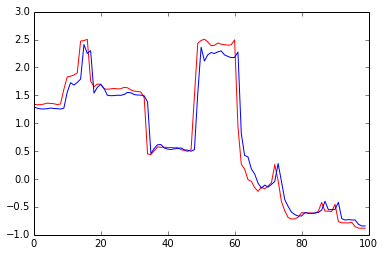

Training duration (s) :  364.904089928


In [51]:
#def run_network(model=None, data=None):
model=None
data=None
global_start_time = time.time()
epochs = 1
ratio = 0.5
sequence_length = 50
path_to_dataset = 'household_power_consumption.txt'

if data is None:
    print 'Loading data... '
    X_train, y_train, X_test, y_test = data_power_consumption(
            path_to_dataset, sequence_length, ratio)
else:
    X_train, y_train, X_test, y_test = data

print '\nData Loaded. Compiling...\n'

if model is None:
    model = build_model()

try:
    model.fit(
        X_train, y_train,
        batch_size=512, nb_epoch=epochs, validation_split=0.05)
    predicted = model.predict(X_test)
    predicted = np.reshape(predicted, (predicted.size,))
except KeyboardInterrupt:
    print 'Training duration (s) : ', time.time() - global_start_time
    #return model, y_test, 0

try:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(y_test[:100],'r')
    plt.plot(predicted[:100])
    plt.show()
except Exception as e:
    print str(e)
print 'Training duration (s) : ', time.time() - global_start_time

#return model, y_test, predicted

In [52]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(922131, 49, 1)
(922131,)
(102459, 49, 1)
(102459,)


In [53]:
y_test.shape

(102459,)

In [54]:
predicted

array([ 1.29160738,  1.27021921,  1.25688684, ...,  0.21802703,
        0.21408686,  0.20804794])

In [55]:
y_test

array([ 1.33890356,  1.33090356,  1.33290356, ...,  0.22090356,
        0.21690356,  0.20090356])

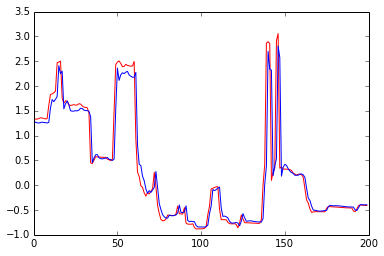

In [64]:
try:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(y_test[:200],'r')
    plt.plot(predicted[:200])
    plt.show()
except Exception as e:
    print str(e)